# GTDB classification overview

For taxonomic classification we generally use [GTDB](https://gtdb.ecogenomic.org/) in order to assign taxonomy to our SAGs. We like GTDB because it uses a combination of marker genes and ANI based clustering methods to classify SAGs. GTDB also has an extremely large (~250,000) genomes that is uses for the ANI classification. The utilization of this databse is critical for enviornmental samples.
[Paper](https://academic.oup.com/bioinformatics/advance-article-abstract/doi/10.1093/bioinformatics/btz848/5626182) describing the software and database

[Github](https://github.com/Ecogenomics/GTDBTk) repository with documentation

Like many of the software programs that we use GTDB is available to install from anaconda. We create a conda environment and install the GTDB software and all of its dependencies there. Installation instructions available [here](https://ecogenomics.github.io/GTDBTk/installing/bioconda.html)
```
conda create -n gtdbtk-1.5.0 -c conda-forge -c bioconda gtdbtk=1.5.0
conda activate gtdbtk-1.5.0

```
You can check your install with this command 
```
gtdbtk check_install
```

Once the software is insalled you ahve to download the databases. Note that the databases for GTDB are extremely large and require a total of (~230 GB of storage) in order to isntall both Archaea and Bacteria databases.

# Do NOT run this command on the hub.
```
download-db.sh
```

GTDB comes with multiple workflows and options that you can run. Most of the time the classify_wf worfklow is going to be the one that you use to classify SAGs.

<br>


GTDBtk classify_wf is a beast of a workflow, and has really high memory and storage requirements.  As such, we've run all AG-910 SAGs through GTDBtk in advance of this course so that we don't burden this hub.

The command we used to run GTDBtk is:
```
gtdbtk classify_wf --genome_dir storage/data/contigs/AG-910 --out_dir storage/lesson_analyses/GTDB/AG-910_gtdb_1.5_classify_wf_out2 --cpus 64 -x fasta
```

You can find the results of that run here:
```
~/storage/data/Analyses/GTDB/AG-910_gtdb_1.5_classify_wf_out2
```

Let's look through the output directory now:

In [2]:
!ls /mnt/storage/lesson_analyses/GTDB/AG-910_gtdb_1.5_classify_wf_out2

align				   gtdbtk.bac120.msa.fasta
classify			   gtdbtk.bac120.summary.tsv
gtdbtk.ar122.filtered.tsv	   gtdbtk.bac120.user_msa.fasta
gtdbtk.ar122.markers_summary.tsv   gtdbtk.failed_genomes.tsv
gtdbtk.ar122.msa.fasta		   gtdbtk.log
gtdbtk.bac120.classify.tree	   gtdbtk.translation_table_summary.tsv
gtdbtk.bac120.filtered.tsv	   gtdbtk.warnings.log
gtdbtk.bac120.markers_summary.tsv  identify


There are a number of different outputs.  The single most important file is:

gtdbtk.bac120.summary.tsv: This file contains a summary of the classification, classification method, and any errors or warnings that might have happened.

Now, let's take a deep dive into the summary file for this plate so that we can explore the taxonomic annotations of different single cells in our sample.

In [3]:
import pandas as pd
import os
import sys
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import seaborn as sns

# modify pandas variabls to only show 10 rows.
pd.set_option("display.max_rows", 10)

os.chdir('/mnt/storage/user_lab/jmunson-mcgee/day2am_taxonomy_lesson/')

outdir = "./tbls/"
figdir = "./figs/"

if not os.path.exists(outdir):
    os.mkdir(outdir)
if not os.path.exists(figdir):
    os.mkdir(figdir)

summary_file = '/mnt/storage/lesson_analyses/GTDB/AG-910_gtdb_1.5_classify_wf_out2/gtdbtk.bac120.summary.tsv'

# First step load the data into dataframes and examine it. 


In [4]:

GTDB_df=pd.read_csv(summary_file, sep='\t')


GTDB_df.head()

,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
0,AG-910-A02_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_003280455.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,95.95,0.80,GCA_003280455.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,95.95,0.80,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902563885.1, s__TMED112 sp902563885, 95.0,...",52.63,11,NaN,NaN
1,AG-910-A04_contigs,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,GCA_902615855.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,99.96,0.94,GCA_902615855.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,99.96,0.94,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_003213625.1, s__Actinomarina sp003213625, ...",31.09,11,NaN,NaN
2,AG-910-A06_contigs,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,GCA_902567045.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,97.82,0.84,GCA_902567045.1,95.0,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,97.82,0.84,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902596915.1, s__Pelagibacter sp902596915, ...",70.76,11,NaN,NaN
3,AG-910-A10_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_902518715.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,96.38,0.80,GCA_902518715.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,96.38,0.80,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902541365.1, s__CACNXK01 sp902541365, 95.0...",68.37,11,NaN,NaN
4,AG-910-A13_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_002702235.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,98.62,0.92,GCA_002702235.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,98.62,0.92,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,NaN,43.52,11,NaN,NaN


Let's take a look at all of the columns this table has:

In [5]:
GTDB_df.columns

Index(['user_genome', 'classification', 'fastani_reference',
       'fastani_reference_radius', 'fastani_taxonomy', 'fastani_ani',
       'fastani_af', 'closest_placement_reference', 'closest_placement_radius',
       'closest_placement_taxonomy', 'closest_placement_ani',
       'closest_placement_af', 'pplacer_taxonomy', 'classification_method',
       'note',
       'other_related_references(genome_id,species_name,radius,ANI,AF)',
       'msa_percent', 'translation_table', 'red_value', 'warnings'],
      dtype='object')

GTDB provides a lot of informaiton about both the final calssification as well as how it classified a genome. While most of these columns are interesting they are not really all that important for a majority of the gneomes that are run through GTDB

The important columns are:
1. user_genome
2. classification
3. classification_method
4. warnings

These columns provide the genome (SAG) that was analyzed, what it is classified as, how it was classified and if there were any warnings that occured during the pipeline.

Lets start by looking at how the SAGs were classified?

In [6]:
from collections import Counter
Counter(GTDB_df['classification_method'])

Counter({'taxonomic classification defined by topology and ANI': 152,
         'ANI': 18})

Most of our SAGs were defined by a combination of both topology and ANI but some were only classified via ANI. This is just fine and we frequently see this when working with genomes that are not complete as is the case with SAG genomes.

Lets check and see if there is anything that we should be concerned about

In [7]:
Counter(GTDB_df['warnings'])

Counter({nan: 116,
         'Genome not assigned to closest species as it falls outside its pre-defined ANI radius': 51,
         'Genome domain questionable ( 14.2% Bacterial, 4.9% Archaeal)': 1,
         'Genome domain questionable ( 11.7% Bacterial, 2.5% Archaeal)': 1,
         'Genome domain questionable ( 10.8% Bacterial, 4.1% Archaeal)': 1})

There are a significant number of cells that were not assigned to a species but again this is very common when working with SAG data. This is generally due either the fact that despite being a very large database GTDB is still missing representative genomes for many species in the ocean or because the incomplete nature of most SAG genomes makes it difficult to assign species.


Lets take a closer look at the ones that have a questionable domain. This could be due to small genome size or contamination or something else so it is worth checking out in a bit more detail.

In [8]:
check_df=GTDB_df[GTDB_df.warnings.str.contains('Genome domain questionable', na=False)]
check_df


,user_genome,classification,fastani_reference,fastani_reference_radius,fastani_taxonomy,fastani_ani,fastani_af,closest_placement_reference,closest_placement_radius,closest_placement_taxonomy,closest_placement_ani,closest_placement_af,pplacer_taxonomy,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",msa_percent,translation_table,red_value,warnings
49,AG-910-D21_contigs,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,GCA_902596665.1,95.0,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,96.02,0.92,NaN,NaN,NaN,NaN,NaN,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,ANI,topological placement and ANI have incongruent...,"GCA_902596665.1, s__CACNYO01 sp902596665, 95.0...",13.96,11,NaN,"Genome domain questionable ( 14.2% Bacterial, ..."
71,AG-910-G08_contigs,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,GCA_902619825.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,97.06,0.95,GCA_902526825.1,95.0,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,93.28,0.62,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,ANI,topological placement and ANI have incongruent...,"GCA_902587025.1, s__Actinomarina sp902587025, ...",11.40,11,NaN,"Genome domain questionable ( 11.7% Bacterial, ..."
85,AG-910-I14_contigs,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,GCA_002702875.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,96.76,0.70,GCA_002702875.1,95.0,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,96.76,0.70,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__...,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_902514625.1, s__TMED220 sp902514625, 95.0,...",10.11,11,NaN,"Genome domain questionable ( 10.8% Bacterial, ..."


The fastani_ani scores as the fastani_af are both relativelly high for all of the cells so I am not going to worry about them. It could be that these cells just have small genomes so a small piece segment results in the appearance of a significant allignment to archaea

<br>

Let's take a peek at the structure of GTDBtk classifications:

In [9]:
Counter(GTDB_df['classification']).most_common()[:10]

[('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__',
  16),
 ('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter_A;s__',
  11),
 ('d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__SAR86;f__TMED112;g__TMED112;s__TMED112 sp003280455',
  4),
 ('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Pelagibacterales;f__Pelagibacteraceae;g__Pelagibacter;s__Pelagibacter sp003209915',
  4),
 ('d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Flavobacteriales;f__Flavobacteriaceae;g__GCA-2862715;s__GCA-2862715 sp002862715',
  3),
 ('d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__HIMB59;f__GCA-002718135;g__AG-337-I02;s__',
  3),
 ('d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia;o__PCC-6307;f__Cyanobiaceae;g__Prochlorococcus_A;s__',
  3),
 ('d__Bacteria;p__Actinobacteriota;c__Acidimicrobiia;o__Actinomarinales;f__Actinomarinaceae;g__Actinomarina;s__Actinomarin

Note this plate only contained bacteria. We know this because if there are Archaea in the sample GTDB will produce a seperate file for genomes that are classified as Archaeal. If you have archaea in your samples as well the code below will combine the two outputs into a single table to allow for easier viewing.


The GTDB output table has a lot of extra columns that while very useful are not necssarily the most relevant to our next steps and what we are interested in. Lets go ahead and copy just the columns that we are interested in and proceed with those columns

In [10]:
# Notice that the 'user_genome' column includes the _contigs suffix.  
# I want to have a column that just has the SAG ID for each genome. 
# I'll do that by taking the first 10 characters of each string in the user_genome column.
GTDB_df['SAG']=GTDB_df['user_genome'].str[:10]

# define the columns that we are interested in
cols=['SAG', 'classification', 'classification_method', 'warnings']

# create a new dataframe with just the columns from GTDB of interest
class_df=GTDB_df[cols].copy()

# split the classification into tax level columns and rename
class_df[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=class_df.classification.str.split(';', expand=True)
class_df=class_df.rename(columns = {'classification':'GTDBtk_classification'})

# add a count column
class_df['cells']=1

#reset the index and save just the calssifications
class_df.reset_index(inplace=True)
class_df.drop(columns='index', inplace=True)
class_df.to_csv(os.path.join(outdir,'AG-910_GTDB_classifications.csv'))

#show the dataframe
class_df

,SAG,GTDBtk_classification,classification_method,warnings,domain,phyla,class,order,family,genus,species,cells
0,AG-910-A02,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__TMED112,g__TMED112,s__TMED112 sp003280455,1
1,AG-910-A04,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp902615855,1
2,AG-910-A06,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902567045,1
3,AG-910-A10,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__D2472,g__CACNXK01,s__CACNXK01 sp902518715,1
4,AG-910-A13,d__Bacteria;p__Proteobacteria;c__Gammaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__GCA-002705445,f__GCA-002705445,g__GCA-2702235,s__GCA-2702235 sp002702235,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165,AG-910-P07,d__Bacteria;p__Cyanobacteria;c__Cyanobacteriia...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__PCC-6307,f__Cyanobiaceae,g__Prochlorococcus_A,s__Prochlorococcus_A sp902520485,1
166,AG-910-P08,d__Bacteria;p__Actinobacteriota;c__Acidimicrob...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp003213165,1
167,AG-910-P13,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,Genome not assigned to closest species as it f...,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Puniceispirillales,f__AAA536-G10,g__TMED54,s__,1
168,AG-910-P17,d__Bacteria;p__Proteobacteria;c__Alphaproteoba...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902594705,1


### Now lets load the SAG metadata and combine it with the GTDB results for further examination

So that we can...

In [11]:
# JULIA WHICH TABLE SHOULD I USE? THESE CHANGED SINCE I STARTED WORKING WITH THEM
# The one that I am currently loading contains all 384 wells

# load the SAG metadata
SAG_data=pd.read_csv('/mnt/storage/data/sag_deliverables/AG-910_gorg-tropics_CelltableS2.csv')
SAG_data=SAG_data.rename(columns={'Sample_ID':'SAG'})

# merge the SAG metadata with the GTDB data 
# note that the outer merge is important to ensure that we keep cells that were not classified.
master_df=SAG_data.merge(class_df, on='SAG', how='outer')
master_df['cells']=1
master_df.head()

,SAG,Sample,Sample feature,FACS mode,Estimated cell diameter (μm),WGA-X Cp (h),Raw read count,Assembly size (Mbp),Final contigs count,Max contig length,...,classification_method,warnings,domain,phyla,class,order,family,genus,species,cells
0,AG-910-A01,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.18,3.239536,61589,72175,14,20059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,AG-910-A02,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.24,1.769893,2596242,502406,26,120161,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86,f__TMED112,g__TMED112,s__TMED112 sp003280455,1
2,AG-910-A03,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.29,2.200094,2514079,240410,32,24968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,AG-910-A04,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.23,1.959266,2648866,473338,24,111384,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Actinobacteriota,c__Acidimicrobiia,o__Actinomarinales,f__Actinomarinaceae,g__Actinomarina,s__Actinomarina sp902615855,1
4,AG-910-A06,SWC-09,BATS Mixed Layer ~20% narB,Syto9-Prok,0.28,1.980436,2652499,1010309,40,179684,...,taxonomic classification defined by topology a...,NaN,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Pelagibacterales,f__Pelagibacteraceae,g__Pelagibacter,s__Pelagibacter sp902567045,1


### Now lets examine how many SAGs were classified and the percent of SAGs that were classified to different tax levels

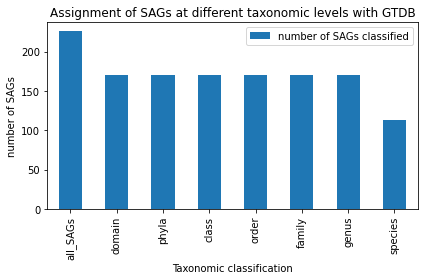

In [12]:


# for each tax level create a variable with the number of SAGs that were classified to at least that level
dsags=len(class_df[class_df['domain']!='d__'])
psags=len(class_df[class_df['phyla']!='p__'])
csags=len(class_df[class_df['class']!='c__'])
osags=len(class_df[class_df['order']!='o__'])
fsags=len(class_df[class_df['family']!='f__'])
gsags=len(class_df[class_df['genus']!='g__'])
ssags=len(class_df[class_df['species']!='s__'])

# Calculate the total nubmer of SAGs submitted to the analysis.
# note that for the total number of SAGs we are using the master_df that merged the GTDB results with the assembly stats
# this is because GTDB will omit SAGs that are unable to be classified
tsags=len(master_df['domain'])

# create a dictionary of the taxonomic levels and the value associated with it and thenconvert to a dataframe.
d={'tax_level': ['all_SAGs', 'domain', 'phyla', 'class', 'order', 'family', 'genus','species'], 'number of SAGs classified':
   [tsags, dsags, psags, csags, osags, fsags, gsags, ssags]}
GTDB_data_df=pd.DataFrame(data=d)


# create a plot showing how many cells are classified at each taxonomic level 
GTDB_data_df.plot(kind='bar', x='tax_level', y='number of SAGs classified')
plt.xlabel('Taxonomic classification')
plt.ylabel('number of SAGs')
plt.title('Assignment of SAGs at different taxonomic levels with GTDB')

plt.tight_layout()
plt.savefig(os.path.join(figdir,"GTDB_taxonomic_levels.pdf"))


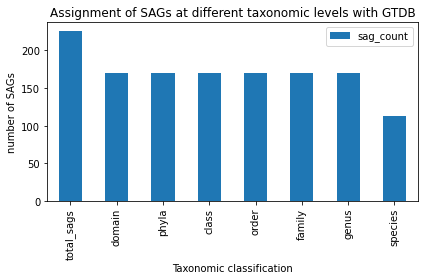

In [13]:
# alternative approach:

class_count = {}

class_count['total_sags'] = len(master_df)

for level in ['domain','phyla','class','order','family','genus','species']:
    # it's a true assignment if there's text beyond 'x__' which is a three-character string
    
    class_count[level] = len([i for i in class_df[level] if len(i) > 3])
    

class_count_df = pd.DataFrame(data = {'tax_level':class_count.keys(), 'sag_count':class_count.values()})

class_count_df.plot(kind='bar', x='tax_level', y='sag_count')
plt.xlabel('Taxonomic classification')
plt.ylabel('number of SAGs')
plt.title('Assignment of SAGs at different taxonomic levels with GTDB')

plt.tight_layout()
plt.savefig(os.path.join(figdir,'GTDB_taxonomic_levels_counter_method.pdf'))

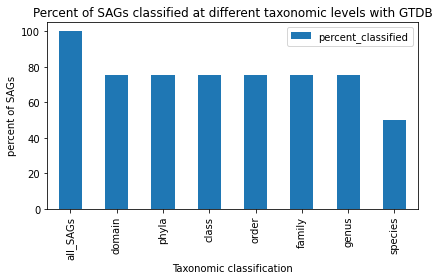

In [14]:
# add a column to the dataframe that is the percent of SAGs and replot.
# use the tsags variable previously created to calculate the percent of SAGs that were classified
GTDB_data_df['percent_classified']=GTDB_data_df['number of SAGs classified']/tsags*100


# generate the plot
GTDB_data_df.plot(kind='bar', x='tax_level', y='percent_classified')
plt.xlabel('Taxonomic classification')
plt.ylabel('percent of SAGs')
plt.title('Percent of SAGs classified at different taxonomic levels with GTDB')

plt.tight_layout()
plt.savefig(os.path.join(figdir,"GTDB_taxonomic_levels_percent.pdf"))

Interestingly all the SAGs that were classified (~75%) were classified to the genus level. There was a significant dropoff at the species level where only ~50% of SAGs were classified to the species level. 

### Now lets dive into the data a bit more and see what the distribution of different taxonomic groups is

In [15]:
# lets start with the distribution of Bacteria and Archaea
print(master_df.domain.value_counts())


d__Bacteria    170
Name: domain, dtype: int64


In [16]:
# and class
print(master_df.class.value_counts()) 

SyntaxError: invalid syntax (2670553401.py, line 2)

note the class level does not work because class is a method in python instead we can use the groupby function


In [17]:

grouped=master_df.groupby('class')['cells'].count()
grouped#.sort()


class
c__Acidimicrobiia           7
c__Alphaproteobacteria    117
c__Bacteroidia              8
c__Cyanobacteriia          11
c__Gammaproteobacteria     27
Name: cells, dtype: int64

Another way to do this is by using a function called Counter:

# Challenge 1 look at the distribution for the other taxonomic levels (phyla, order, family, genus, species) and sort the output from high to low


In [18]:

# print top five groups in each level
for taxa in ['domain', 'phyla','class','order','family','genus','species']:
    print(master_df.groupby(taxa)['cells'].count().sort_values(ascending=False)[:5])
    print("\n")

domain
d__Bacteria    170
Name: cells, dtype: int64


phyla
p__Proteobacteria      144
p__Cyanobacteria        11
p__Bacteroidota          8
p__Actinobacteriota      7
Name: cells, dtype: int64


class
c__Alphaproteobacteria    117
c__Gammaproteobacteria     27
c__Cyanobacteriia          11
c__Bacteroidia              8
c__Acidimicrobiia           7
Name: cells, dtype: int64


order
o__Pelagibacterales    86
o__SAR86               23
o__HIMB59              18
o__PCC-6307            11
o__Flavobacteriales     8
Name: cells, dtype: int64


family
f__Pelagibacteraceae    82
f__Cyanobiaceae         11
f__HIMB59               10
f__GCA-002718135         8
f__D2472                 8
Name: cells, dtype: int64


genus
g__Pelagibacter         54
g__Pelagibacter_A       19
g__HIMB59               10
g__Prochlorococcus_A    10
g__AG-337-I02            8
Name: cells, dtype: int64


species
s__                            57
s__Pelagibacter sp003209915     4
s__TMED112 sp003280455          4
s__GCA-

Lets start by taking a closer look at the distribution of different orders

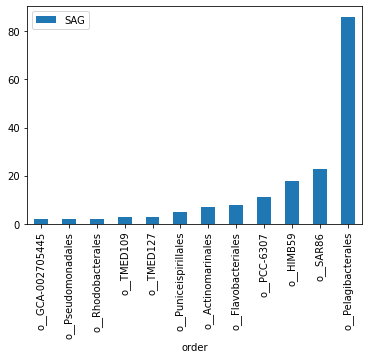

In [19]:
order_df = master_df.groupby('order', as_index=False)['SAG'].count().sort_values(by = 'SAG')

order_df.plot('order','SAG',kind = 'bar')

plt.savefig(os.path.join(figdir,"GTDB_order_distribution.pdf"))

Unsurprisingly there are a lot of pelagibacterales in this sample followed by SAR86 cells.
<br>

As we saw above all the cells that are classified are classified to at least the genus level so lets go ahead and look at the distribution of genera within this sample. 


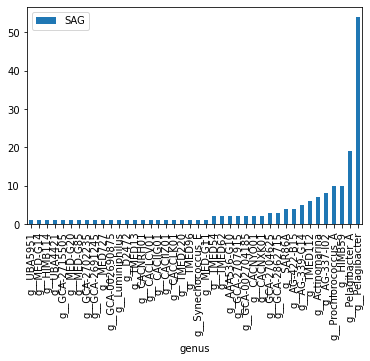

In [20]:
genera_df = master_df.groupby('genus', as_index=False)['SAG'].count().sort_values(by = 'SAG')

genera_df.plot('genus','SAG',kind = 'bar')

plt.savefig(os.path.join(figdir,"GTDB_genus_distribution.pdf"))


There are a lot of genera in this sample so lets focus on just the genera within Alphaproteobacteria.

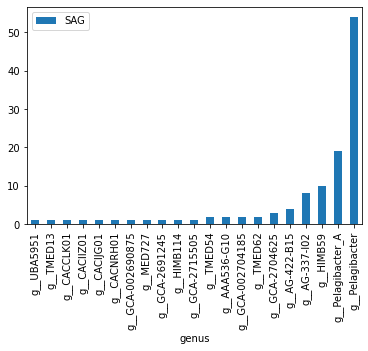

In [21]:
alpha_genera = master_df[(master_df['class'] == 'c__Alphaproteobacteria')].groupby('genus', as_index=False)['SAG'].count().sort_values(by = 'SAG')

alpha_genera.plot('genus','SAG',kind = 'bar')

plt.savefig(os.path.join(figdir,"GTDB_alphaproteobacteria_genera_distribution.pdf"))


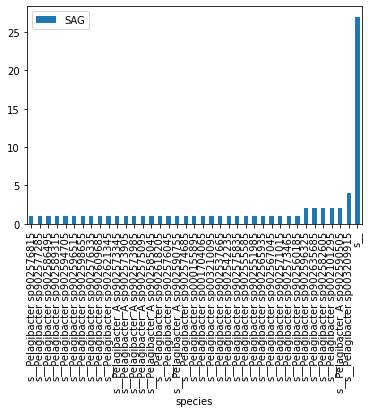

In [22]:
sar11_specs = master_df.dropna(subset = ['genus'])[(master_df.dropna(subset = ['genus'])['genus'].str.contains('Pelagibacter'))].fillna('unknown').groupby('species', as_index=False)['SAG'].count().sort_values(by = 'SAG')

sar11_specs.dropna().plot('species','SAG',kind = 'bar')

plt.savefig(os.path.join(figdir,"GTDB_SAR11_species_distribution.pdf"))


So a lot of Pelagibacter whose species is unknown.  And if their species is defined, they are unique relative to other members on the plate. That's kind of cool, and speaks to the novelty that we observed across the global tropical surface ocean.  



# Challenge 2: Examine the average genome size, completeness, estimated diameter, and number of cells for all members of given taxonomic level and create a plot to look at these distributions

In [23]:
# calculate the mean for selected genome assembly parameters
genome_statistics=master_df.groupby('genus')['Assembly size (Mbp)', 'Estimated cell diameter (μm)',
                                             'Genome completeness (%)'].mean()

# Calculate the total number of cells for each genus
genus_counts=master_df.groupby(['genus','class'])['cells'].sum()

genome_statistics=genome_statistics.merge(genus_counts, left_index=True, right_index=True)
genome_statistics=genome_statistics.round(2)
genome_statistics.reset_index(inplace=True)
genome_statistics

/tmp/ipykernel_551303/3022042437.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genome_statistics=master_df.groupby('genus')['Assembly size (Mbp)', 'Estimated cell diameter (μm)',


,genus,class,Assembly size (Mbp),Estimated cell diameter (μm),Genome completeness (%),cells
0,g__AAA536-G10,c__Alphaproteobacteria,1335418.50,0.44,49.50,2
1,g__AG-337-I02,c__Alphaproteobacteria,760587.75,0.39,43.88,8
2,g__AG-339-G14,c__Gammaproteobacteria,722793.40,0.29,48.00,5
3,g__AG-422-B15,c__Alphaproteobacteria,638639.00,0.25,36.00,4
4,g__Actinomarina,c__Acidimicrobiia,555009.71,0.22,38.14,7
...,...,...,...,...,...,...
37,g__TMED54,c__Alphaproteobacteria,620755.00,0.28,28.00,2
38,g__TMED62,c__Alphaproteobacteria,637046.50,0.38,30.00,2
39,g__TMED96,c__Bacteroidia,1088902.00,0.35,49.00,1
40,g__UBA4421,c__Gammaproteobacteria,895072.00,0.34,20.00,1


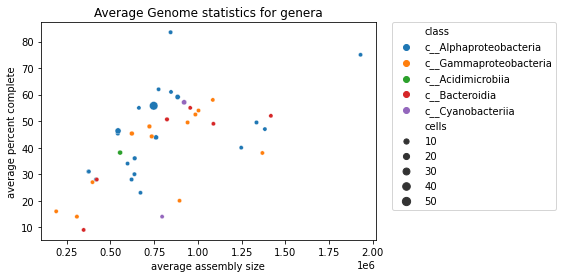

In [24]:
# Create the a scatter plot with the assembly size and genome completentess.
# We are using seaborn here because it handles converting strings to colors much better than matplotlib
sns.scatterplot(data=genome_statistics, x='Assembly size (Mbp)', y='Genome completeness (%)', 
                size='cells', hue='class')
plt.xlabel('average assembly size')
plt.ylabel('average percent complete')
plt.title('Average Genome statistics for genera')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(figdir,"Genome_statistics_for_genera.pdf"))

# Challenge 2.5 What if you wanted to add the standard deviation to your analysis?

In [25]:
genome_stdev=master_df.groupby('genus')['Estimated cell diameter (μm)', 'Assembly size (Mbp)', 
                                             'Genome completeness (%)'].std()
genome_stdev=genome_stdev.rename(columns={'Estimated cell diameter (μm)':'Estimated cell diameter (μm) stdev',
                                          'Assembly size (Mbp)':'Assembly size (Mbp)_stdev', 
                                          'Genome completeness (%)':'Genome completeness (%)_stdev'})
genome_statistics=genome_statistics.merge(genome_stdev, on='genus')
genome_statistics

/tmp/ipykernel_551303/3331405751.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genome_stdev=master_df.groupby('genus')['Estimated cell diameter (μm)', 'Assembly size (Mbp)',


,genus,class,Assembly size (Mbp),Estimated cell diameter (μm),Genome completeness (%),cells,Estimated cell diameter (μm) stdev,Assembly size (Mbp)_stdev,Genome completeness (%)_stdev
0,g__AAA536-G10,c__Alphaproteobacteria,1335418.50,0.44,49.50,2,0.056569,321185.577684,16.263456
1,g__AG-337-I02,c__Alphaproteobacteria,760587.75,0.39,43.88,8,0.041404,249944.546615,15.468286
2,g__AG-339-G14,c__Gammaproteobacteria,722793.40,0.29,48.00,5,0.063008,349966.327554,18.096961
3,g__AG-422-B15,c__Alphaproteobacteria,638639.00,0.25,36.00,4,0.067823,72093.601505,14.628739
4,g__Actinomarina,c__Acidimicrobiia,555009.71,0.22,38.14,7,0.031320,218493.381514,16.915758
...,...,...,...,...,...,...,...,...,...
37,g__TMED54,c__Alphaproteobacteria,620755.00,0.28,28.00,2,0.021213,451250.091909,21.213203
38,g__TMED62,c__Alphaproteobacteria,637046.50,0.38,30.00,2,0.028284,675.286976,1.414214
39,g__TMED96,c__Bacteroidia,1088902.00,0.35,49.00,1,NaN,NaN,NaN
40,g__UBA4421,c__Gammaproteobacteria,895072.00,0.34,20.00,1,NaN,NaN,NaN


/opt/tljh/user/envs/biopy/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/tljh/user/envs/biopy/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/tljh/user/envs/biopy/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/opt/tljh/user/envs/biopy/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/opt/tljh/user/envs/biopy/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, wh

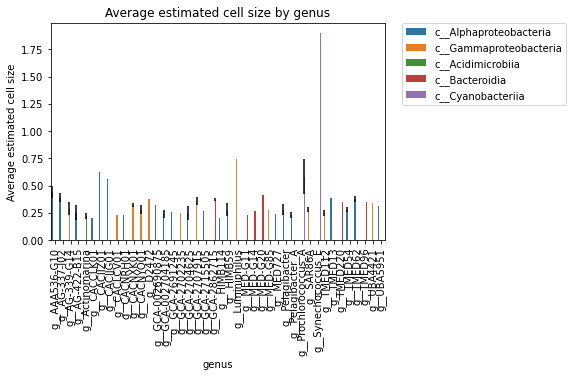

In [26]:
# create a barplot and examine the variations of the estiamted diameter

sns.barplot(data=genome_statistics, x='genus', y='Estimated cell diameter (μm)', hue='class', 
            yerr=genome_statistics['Estimated cell diameter (μm) stdev'])
plt.xlabel('genus')
plt.ylabel('Average estimated cell size')
plt.title('Average estimated cell size by genus')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)

plt.savefig(os.path.join(figdir,"Estimated_cell_size_for_genera.pdf"))

# Challenge 3: Compare the number of SAGs that were classified via 16S to the number that were classified using GTDB at each taxonomic level

In [27]:
# copy the SAG column and the 16S column to a new df
SSU_df=master_df[['SSU classification CREST/SILVA']].copy()

# change the name to eliminate the spaces and "/"
SSU_df=SSU_df.rename(columns = {'SSU classification CREST/SILVA':'SSU_classification'})

# expand the classification similar to before.
SSU_df[['domain', 'phyla', 'class', 'order', 'family', 'genus', 'species']]=SSU_df.SSU_classification.str.split(';', expand=True)
# SSU_df=SSU_df.rename(columns = {'SSU classification CREST/SILVA':'GTDBtk_classification'})
SSU_df.fillna('', inplace=True)

SSU_df
SSU_count = {}

SSU_count['total_sags'] = len(master_df)

SSU_count['domain']=len(SSU_df[SSU_df['domain']!='no SSU regions found'])


for level in ['phyla','class','order','family','genus','species']:
    # it's a true assignment if there's text beyond 'x__?' which is a four-character string. 
    
    SSU_count[level] = len([i for i in SSU_df[level] if len(i) > 4])
    

SSU_count_df = pd.DataFrame(data = {'tax_level':SSU_count.keys(), 'sag_count':SSU_count.values()})

SSU_count_df


,tax_level,sag_count
0,total_sags,226
1,domain,67
2,phyla,67
3,class,67
4,order,67
5,family,59
6,genus,17
7,species,0


In [28]:
# add the method column to our dfs 
class_count_df['method']='GTDB'
SSU_count_df['method']='SSU'

# stack the dataframes into a single dataframe for easier plotting
compare_df=pd.concat([class_count_df, SSU_count_df])
compare_df

# add a percent column
compare_df['percent_classified']=compare_df['sag_count']/tsags*100

compare_df

,tax_level,sag_count,method,percent_classified
0,total_sags,226,GTDB,100.000000
1,domain,170,GTDB,75.221239
2,phyla,170,GTDB,75.221239
3,class,170,GTDB,75.221239
4,order,170,GTDB,75.221239
...,...,...,...,...
3,class,67,SSU,29.646018
4,order,67,SSU,29.646018
5,family,59,SSU,26.106195
6,genus,17,SSU,7.522124


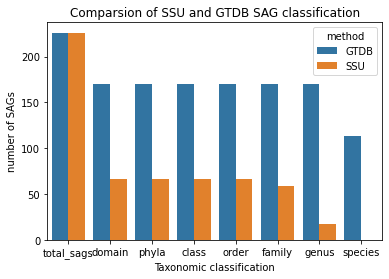

In [29]:

# plot the data. We are using seaborn this time because it handles colors assigning colors 
# to strings in columns better than matolotlib
sns.barplot(data=compare_df, x='tax_level', y='sag_count', hue='method')

#add labels and titles
plt.xlabel('Taxonomic classification')
plt.ylabel('number of SAGs')
plt.title('Comparsion of SSU and GTDB SAG classification')

plt.savefig(os.path.join(figdir,"GTDB_SSU_classification_comparsion.pdf"))


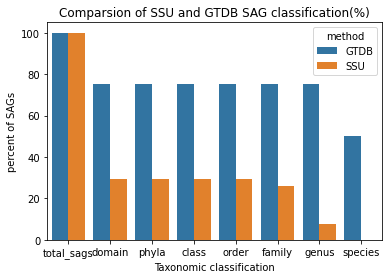

In [30]:
# generate a plot of the percentages
sns.barplot(data=compare_df, x='tax_level', y='percent_classified', hue='method')

plt.xlabel('Taxonomic classification')
plt.ylabel('percent of SAGs')
plt.title('Comparsion of SSU and GTDB SAG classification(%)')

plt.savefig(os.path.join(figdir,"GTDB_SSU_classification_comparsion_percentages.pdf"))

Additional exploratory ideas

1. How many genera have at least 3 cells that were assigned to them?
1. What genus has the smallest estimated genome size? how about the largest?
    1. Consider limiting this analysis to only those genera with at least 3 cells
1. How many Gammaproteobacteria genera were identified?
1. 